# Analyse Cluster

The aim of this notebook is to analyse the clustering results in more detail and compare the clusters

### imports and preprocessing

In [2]:
import pickle
import json
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

In [3]:
specs = dict()

with open('obj/diff_specs.pkl', 'rb') as handle:
    specs = pickle.load(handle)

keys = list(specs.keys())
print(keys)
len(keys)

['1forge.com', '6-dot-authentiqio.appspot.com', 'adafruit.com', 'adobe.com:aem', 'adyen.com:CheckoutService', 'adyen.com:PaymentService', 'adyen.com:RecurringService', 'afterbanks.com', 'agco-ats.com', 'airport-web.appspot.com', 'amadeus.com', 'amazonaws.com:AWSMigrationHub', 'amazonaws.com:acm', 'amazonaws.com:acm-pca', 'amazonaws.com:alexaforbusiness', 'amazonaws.com:apigateway', 'amazonaws.com:application-autoscaling', 'amazonaws.com:appstream', 'amazonaws.com:appsync', 'amazonaws.com:athena', 'amazonaws.com:autoscaling', 'amazonaws.com:autoscaling-plans', 'amazonaws.com:batch', 'amazonaws.com:budgets', 'amazonaws.com:ce', 'amazonaws.com:cloud9', 'amazonaws.com:clouddirectory', 'amazonaws.com:cloudformation', 'amazonaws.com:cloudfront', 'amazonaws.com:cloudhsm', 'amazonaws.com:cloudhsmv2', 'amazonaws.com:cloudsearch', 'amazonaws.com:cloudsearchdomain', 'amazonaws.com:cloudtrail', 'amazonaws.com:codebuild', 'amazonaws.com:codecommit', 'amazonaws.com:codedeploy', 'amazonaws.com:codepi

1034

## length of the specs

In [4]:
specs_string = dict()

for spec in specs:
    str_spec = json.dumps(specs[spec])
    specs_string[spec] = str_spec
print(len(specs_string.keys()))

1034


In [5]:
with open('obj/specs_string_diff.pkl', 'wb') as handle:
    pickle.dump(specs_string, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
spec_len = list()
for spec in specs_string:
    length = len(specs_string[spec])
    spec_len.append(length)
print(len(spec_len))

1034


In [7]:
#minimal length of spec
min(spec_len)

1362

In [8]:
#maximal length of spec
max(spec_len)

3259941

In [9]:
#mean length of spec
np.mean(spec_len)

73440.53578336557

In [10]:
#median length of spec
np.median(spec_len)

28559.5

In [11]:
#mode of list
max(set(spec_len), key=spec_len.count)

2883

In [12]:
with open('obj/spec_len_diff.pkl', 'wb') as handle:
    pickle.dump(spec_len, handle, protocol=pickle.HIGHEST_PROTOCOL)

## prepare dataframes for extensiveness and structure

In [13]:
pathdf = pd.read_csv('PAMpath_diff.csv',index_col='X')
pathdf = pathdf.iloc[:,1:]
pathdf['spec_len'] = spec_len
pathdf.head()

,paths,operations,pam_fit$clustering,spec_len
X,,,,
1forge.com,2,2,1,1362
6-dot-authentiqio.appspot.com,5,14,2,13452
adafruit.com,34,69,3,65937
adobe.com:aem,27,31,4,22375
adyen.com:CheckoutService,2,2,1,32365


In [14]:

col_list = ['swagger','info','host','basePath','schemes','consumes','produces','paths','definitions','parameters','responses','securityDefinitions','security','tags','externalDocs','title','description','termsOfService','contact','license','version']
col_list

['swagger',
 'info',
 'host',
 'basePath',
 'schemes',
 'consumes',
 'produces',
 'paths',
 'definitions',
 'parameters',
 'responses',
 'securityDefinitions',
 'security',
 'tags',
 'externalDocs',
 'title',
 'description',
 'termsOfService',
 'contact',
 'license',
 'version']

In [15]:
structdf = pd.read_csv('PAMcomplete_diff.csv',index_col='X')
structdf = structdf.iloc[:,1:]
structdf['fields'] = structdf[col_list].sum(axis=1)
structdf['spec_len'] = spec_len
structdf.head()

,swagger,info,host,basePath,schemes,consumes,produces,paths,definitions,parameters,...,externalDocs,title,description,termsOfService,contact,license,version,pam_fit$clustering,fields,spec_len
X,,,,,,,,,,,,,,,,,,,,,
1forge.com,1,1,1,1,1,0,1,1,0,0,...,0,1,1,0,1,0,1,1,11,1362
6-dot-authentiqio.appspot.com,1,1,1,1,1,0,0,1,1,1,...,0,1,1,1,1,1,1,2,15,13452
adafruit.com,1,1,1,1,1,0,1,1,1,1,...,0,1,1,0,0,0,1,3,14,65937
adobe.com:aem,1,1,1,1,1,0,0,1,1,0,...,0,1,1,0,1,0,1,3,13,22375
adyen.com:CheckoutService,0,1,0,0,0,0,0,1,0,0,...,0,1,1,0,1,0,1,1,6,32365


## Paths Clustering Results

In [16]:
# cluster of path
pathdf['pam_fit$clustering'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18], dtype=int64)

Plot of Cluster:

![Plot of 18 Cluster](plotPathDiff.png)

Similarity: (first two most similar, last most dissimilar)

In [17]:
SimPathdf = pd.read_csv('Pathsimilar_diff.csv',index_col='X')
SimPathdf = SimPathdf.iloc[:,1:]
SimPathdf.head()

,paths,operations
X,,
googleapis.com:games,52,105
amazonaws.com:autoscaling,52,104
kubernetes.io,488,1381
amazonaws.com:entitlement.marketplace,1,2


Distribution of clusters across the dataset:

In [18]:
#daat.YEARMONTH.value_counts()
pathdf['pam_fit$clustering'].value_counts()

8     105
1      92
4      85
13     79
9      74
5      71
16     70
14     66
3      63
12     62
2      58
17     52
6      49
11     38
10     38
7      17
15     13
18      2
Name: pam_fit$clustering, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002527514FE48>,
      dtype=object)

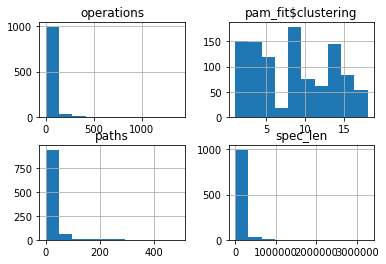

In [19]:
pathdf.hist()

In [72]:
#TODO: Add Charts of correlation


In [20]:
pathdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1034 entries, 1forge.com to zuora.com
Data columns (total 4 columns):
paths                 1034 non-null int64
operations            1034 non-null int64
pam_fit$clustering    1034 non-null int64
spec_len              1034 non-null int64
dtypes: int64(4)
memory usage: 40.4+ KB


In [21]:
pathdf.groupby('pam_fit$clustering').min()

,paths,operations,spec_len
pam_fit$clustering,,,
1,1,2,1362
2,3,11,8700
3,21,44,29567
4,8,25,10787
5,2,6,4286
6,1,3,3210
7,87,116,97302
8,1,1,1446
9,6,18,10124


In [22]:
pathdf.groupby('pam_fit$clustering').aggregate(['min', np.median, np.mean, max])

paths                         operations          \
                     min median        mean  max        min  median   
pam_fit$clustering                                                    
1                      1    2.0    1.706522    2          2     2.0   
2                      3    7.0    7.793103   13         11    12.0   
3                     21   34.0   36.142857   68         44    60.0   
4                      8   17.0   18.929412   32         25    29.0   
5                      2    4.0    4.591549    7          6     6.0   
6                      1    3.0    2.714286    3          3     3.0   
7                     87  116.0  118.176471  157        116   191.0   
8                      1    1.0    1.000000    1          1     1.0   
9                      6   13.0   13.486486   23         18    20.0   
10                    30   44.0   45.842105   66         70    95.5   
11                    52   75.5   75.736842  108         77   126.0   
12                    12   21.0   23.145161   43         34    40.0   
13                     2    6.0    6.113924   10          8     9.0   
14                     1    2.0    2.878788    4          4     4.0   
15                   160  224.0  227.230769  277        206   324.0   
16                     5    9.0   10.614286   17         14    16.0   
17                     2    3.0    3.192308    5          5     5.0   
18                   372  430.0  430.000000  488        881  1131.0   

                                      spec_len                           \
                           mean   max      min     median          mean   
pam_fit$clustering                                                        
1                      2.000000     2     1362     7066.0  1.012976e+04   
2                     12.068966    14     8700    23907.0  4.444621e+04   
3                     59.650794    75    29567   105861.0  1.106712e+05   
4                     29.223529    35    10787    58936.0  6.869822e+04   
5                      6.352113     7     4286    18832.0  2.201020e+04   
6                      3.000000     3     3210    10525.0  2.875657e+04   
7                    203.235294   320    97302   454013.0  4.096485e+05   
8                      1.000000     1     1446     4104.0  8.840286e+03   
9                     20.621622    24    10124    39101.5  5.172751e+04   
10                    93.078947   132    34509   156771.5  1.743157e+05   
11                   128.447368   199    71599   234454.5  2.558766e+05   
12                    40.048387    51    15449    67466.0  8.440124e+04   
13                     9.164557    10     4410    23803.0  2.907522e+04   
14                     4.000000     4     2194    12100.0  1.642341e+04   
15                   332.307692   548   123668   515356.0  8.523892e+05   
16                    16.157143    18     9886    34703.5  4.128486e+04   
17                     5.000000     5     3753    16696.0  2.474825e+04   
18                  1131.000000  1381  1641550  2352599.5  2.352600e+06   

                             
                        max  
pam_fit$clustering           
1                     54642  
2                    595062  
3                    320353  
4                    297325  
5                     83225  
6                    330428  
7                    865317  
8                    130765  
9                    180864  
10                   353598  
11                   682246  
12                   282380  
13                   131571  
14                   119612  
15                  3259941  
16                   153632  
17                   138888  
18                  3063649

In [23]:
pathdf.groupby('pam_fit$clustering').describe()

operations                                           \
                        count         mean         std    min      25%   
pam_fit$clustering                                                       
1                        92.0     2.000000    0.000000    2.0     2.00   
2                        58.0    12.068966    0.988745   11.0    11.00   
3                        63.0    59.650794    7.831200   44.0    54.00   
4                        85.0    29.223529    2.880048   25.0    27.00   
5                        71.0     6.352113    0.481028    6.0     6.00   
6                        49.0     3.000000    0.000000    3.0     3.00   
7                        17.0   203.235294   59.120142  116.0   170.00   
8                       105.0     1.000000    0.000000    1.0     1.00   
9                        74.0    20.621622    1.693685   18.0    19.00   
10                       38.0    93.078947   12.607123   70.0    82.50   
11                       38.0   128.447368   27.360158   77.0   108.75   
12                       62.0    40.048387    3.868441   34.0    37.25   
13                       79.0     9.164557    0.823227    8.0     8.00   
14                       66.0     4.000000    0.000000    4.0     4.00   
15                       13.0   332.307692   91.060771  206.0   274.00   
16                       70.0    16.157143    1.235181   14.0    15.00   
17                       52.0     5.000000    0.000000    5.0     5.00   
18                        2.0  1131.000000  353.553391  881.0  1006.00   

                                             paths                ...      \
                       50%      75%     max  count        mean    ...       
pam_fit$clustering                                                ...       
1                      2.0     2.00     2.0   92.0    1.706522    ...       
2                     12.0    13.00    14.0   58.0    7.793103    ...       
3                     60.0    66.00    75.0   63.0   36.142857    ...       
4                     29.0    32.00    35.0   85.0   18.929412    ...       
5                      6.0     7.00     7.0   71.0    4.591549    ...       
6                      3.0     3.00     3.0   49.0    2.714286    ...       
7                    191.0   244.00   320.0   17.0  118.176471    ...       
8                      1.0     1.00     1.0  105.0    1.000000    ...       
9                     20.0    22.00    24.0   74.0   13.486486    ...       
10                    95.5   100.00   132.0   38.0   45.842105    ...       
11                   126.0   143.50   199.0   38.0   75.736842    ...       
12                    40.0    42.75    51.0   62.0   23.145161    ...       
13                     9.0    10.00    10.0   79.0    6.113924    ...       
14                     4.0     4.00     4.0   66.0    2.878788    ...       
15                   324.0   355.00   548.0   13.0  227.230769    ...       
16                    16.0    17.00    18.0   70.0   10.614286    ...       
17                     5.0     5.00     5.0   52.0    3.192308    ...       
18                  1131.0  1256.00  1381.0    2.0  430.000000    ...       

                                  spec_len                              \
                       75%    max    count          mean           std   
pam_fit$clustering                                                       
1                     2.00    2.0     92.0  1.012976e+04  9.259328e+03   
2                    10.00   13.0     58.0  4.444621e+04  8.088249e+04   
3                    41.00   68.0     63.0  1.106712e+05  5.498404e+04   
4                    25.00   32.0     85.0  6.869822e+04  4.802771e+04   
5                     6.00    7.0     71.0  2.201020e+04  1.482012e+04   
6                     3.00    3.0     49.0  2.875657e+04  6.105574e+04   
7                   124.00  157.0     17.0  4.096485e+05  1.922697e+05   
8                     1.00    1.0    105.0  8.840286e+03  1.619962e+04   
9                    17.75   23.

In [24]:
#Determine pivot table
impute_grps = pathdf.pivot_table(values=["operations","paths"], index=["pam_fit$clustering"], aggfunc=np.mean)
print(impute_grps) 

                     operations       paths
pam_fit$clustering                         
1                      2.000000    1.706522
2                     12.068966    7.793103
3                     59.650794   36.142857
4                     29.223529   18.929412
5                      6.352113    4.591549
6                      3.000000    2.714286
7                    203.235294  118.176471
8                      1.000000    1.000000
9                     20.621622   13.486486
10                    93.078947   45.842105
11                   128.447368   75.736842
12                    40.048387   23.145161
13                     9.164557    6.113924
14                     4.000000    2.878788
15                   332.307692  227.230769
16                    16.157143   10.614286
17                     5.000000    3.192308
18                  1131.000000  430.000000


In [25]:
impute_grps.sort_values('operations')

,operations,paths
pam_fit$clustering,,
8,1.000000,1.000000
1,2.000000,1.706522
6,3.000000,2.714286
14,4.000000,2.878788
17,5.000000,3.192308
5,6.352113,4.591549
13,9.164557,6.113924
2,12.068966,7.793103
16,16.157143,10.614286


In [26]:
mean_len = pathdf[["pam_fit$clustering","spec_len"]]
mean_len = mean_len.groupby('pam_fit$clustering').mean().astype(int)
mean_len

,spec_len
pam_fit$clustering,
1,10129
2,44446
3,110671
4,68698
5,22010
6,28756
7,409648
8,8840
9,51727


In [27]:
med_len = pathdf[["pam_fit$clustering","spec_len"]]
med_len = med_len.groupby('pam_fit$clustering').median()
med_len

,spec_len
pam_fit$clustering,
1,7066.0
2,23907.0
3,105861.0
4,58936.0
5,18832.0
6,10525.0
7,454013.0
8,4104.0
9,39101.5


In [28]:
impute_grps = impute_grps.sort_values('paths')
impute_grps['count'] = pathdf['pam_fit$clustering'].value_counts()
impute_grps['length'] = mean_len
impute_grps['length_med'] = med_len
impute_grps

,operations,paths,count,length,length_med
pam_fit$clustering,,,,,
8,1.000000,1.000000,105,8840,4104.0
1,2.000000,1.706522,92,10129,7066.0
6,3.000000,2.714286,49,28756,10525.0
14,4.000000,2.878788,66,16423,12100.0
17,5.000000,3.192308,52,24748,16696.0
5,6.352113,4.591549,71,22010,18832.0
13,9.164557,6.113924,79,29075,23803.0
2,12.068966,7.793103,58,44446,23907.0
16,16.157143,10.614286,70,41284,34703.5


In [29]:
impute_grps.corr()

,operations,paths,count,length,length_med
operations,1.000000,0.975666,-0.698110,0.997657,0.996966
paths,0.975666,1.000000,-0.773850,0.984966,0.958419
count,-0.698110,-0.773850,1.000000,-0.709361,-0.675008
length,0.997657,0.984966,-0.709361,1.000000,0.990132
length_med,0.996966,0.958419,-0.675008,0.990132,1.000000


In [30]:
impute_grps.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,operations,paths,count,length,length_med
operations,1.0,0.98,-0.7,1.0,1.0
paths,0.98,1.0,-0.77,0.98,0.96
count,-0.7,-0.77,1.0,-0.71,-0.68
length,1.0,0.98,-0.71,1.0,0.99
length_med,1.0,0.96,-0.68,0.99,1.0


In [31]:
impute_grps.corr(method='kendall').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,operations,paths,count,length,length_med
operations,1.0,1.0,-0.52,0.93,1.0
paths,1.0,1.0,-0.52,0.93,1.0
count,-0.52,-0.52,1.0,-0.59,-0.52
length,0.93,0.93,-0.59,1.0,0.93
length_med,1.0,1.0,-0.52,0.93,1.0


In [32]:
impute_grps.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,operations,paths,count,length,length_med
operations,1.0,1.0,-0.69,0.98,1.0
paths,1.0,1.0,-0.69,0.98,1.0
count,-0.69,-0.69,1.0,-0.74,-0.69
length,0.98,0.98,-0.74,1.0,0.98
length_med,1.0,1.0,-0.69,0.98,1.0


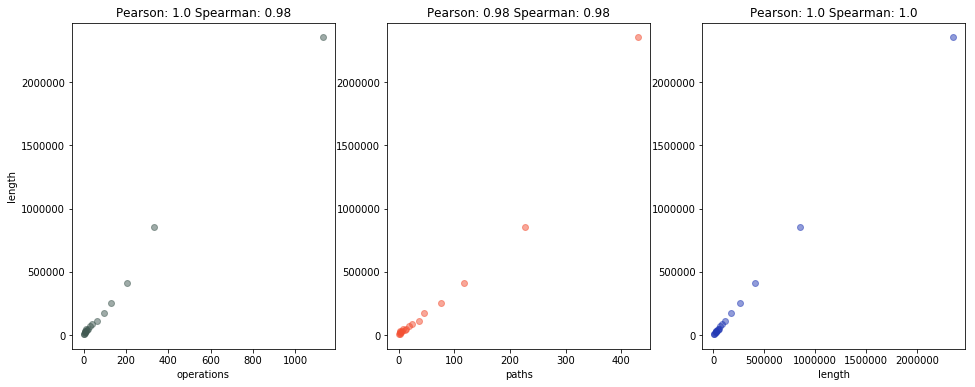

In [33]:
# plot correlated values
plt.rcParams['figure.figsize'] = [16, 6]

fig, ax = plt.subplots(nrows=1, ncols=3)

ax=ax.flatten()

cols = ['operations', 'paths', 'length']
colors=['#415952', '#f35134', '#243AB5', '#243AB5']
j=0

for i in ax:
    if j==0:
        i.set_ylabel('length')
    i.scatter(impute_grps[cols[j]], impute_grps['length'],  alpha=0.5, color=colors[j])
    i.set_xlabel(cols[j])
    i.set_title('Pearson: %s'%impute_grps.corr().loc[cols[j]]['length'].round(2)+' Spearman: %s'%impute_grps.corr(method='spearman').loc[cols[j]]['length'].round(2))
    j+=1

plt.show()

In [34]:
impute_grps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 8 to 18
Data columns (total 5 columns):
operations    18 non-null float64
paths         18 non-null float64
count         18 non-null int64
length        18 non-null int32
length_med    18 non-null float64
dtypes: float64(3), int32(1), int64(1)
memory usage: 1.4 KB


Now lets look into certain clusters:

In [59]:
cluster_n =  pathdf['pam_fit$clustering']==16
pathdf[cluster_n]

,paths,operations,pam_fit$clustering,spec_len
X,,,,
amazonaws.com:lambda,6,17,16,28765
amazonaws.com:mediapackage,5,16,16,51189
amazonaws.com:mobile,7,16,16,28858
amazonaws.com:resource-groups,6,18,16,32089
amazonaws.com:serverlessrepo,6,16,16,52120
amazonaws.com:transcribe,8,16,16,30193
amazonaws.com:xray,8,16,16,38236
azure.com:apimanagement-apimapis,7,17,16,57105
azure.com:apimanagement-apimproducts,8,15,16,53335


## Structure Clustering Results

In [36]:
# cluster of path
structdf['pam_fit$clustering'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

Plot of Clusters:

K = 8
![Plot of 8 Cluster](plotSturctDiff.png)

Similarity: (first two most similar, last most dissimilar)

In [37]:
SimStructdf = pd.read_csv('Structsimilar_diff.csv',index_col='X')
SimStructdf = SimStructdf.iloc[:,1:]
SimStructdf.head()

,swagger,info,host,basePath,schemes,consumes,produces,paths,definitions,parameters,...,securityDefinitions,security,tags,externalDocs,title,description,termsOfService,contact,license,version
X,,,,,,,,,,,,,,,,,,,,,
landregistry.gov.uk:deed,1,1,1,1,1,0,1,1,1,0,...,0,0,0,0,1,1,0,1,0,1
1forge.com,1,1,1,1,1,0,1,1,0,0,...,0,0,0,0,1,1,0,1,0,1
appveyor.com,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
adyen.com:CheckoutService,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,1,0,1


Distribution of clusters across the dataset:

In [38]:
structdf['pam_fit$clustering'].value_counts()

7    219
5    175
1    137
8    125
3    112
4    109
6    102
2     55
Name: pam_fit$clustering, dtype: int64

In [53]:
cor_df = structdf[['fields','spec_len','pam_fit$clustering']]

In [54]:
cor_df.corr(method='kendall').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,fields,spec_len,pam_fit$clustering
fields,1.0,0.23,0.13
spec_len,0.23,1.0,0.052
pam_fit$clustering,0.13,0.052,1.0


In [55]:
cor_df.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,fields,spec_len,pam_fit$clustering
fields,1.0,0.31,0.13
spec_len,0.31,1.0,0.08
pam_fit$clustering,0.13,0.08,1.0


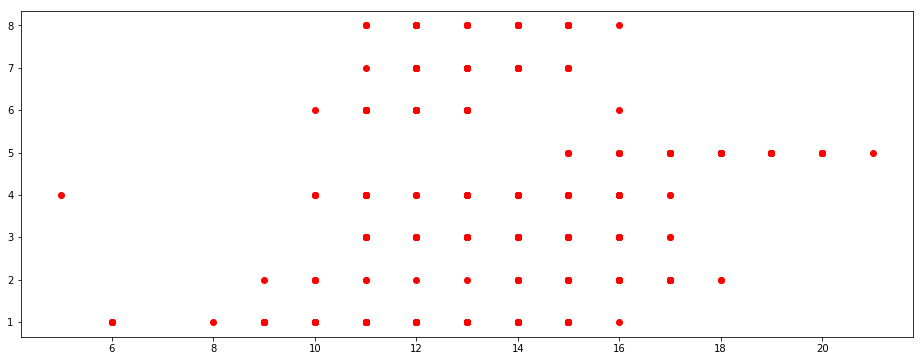

In [41]:

plt.plot(structdf['fields'],structdf['pam_fit$clustering'], 'ro')

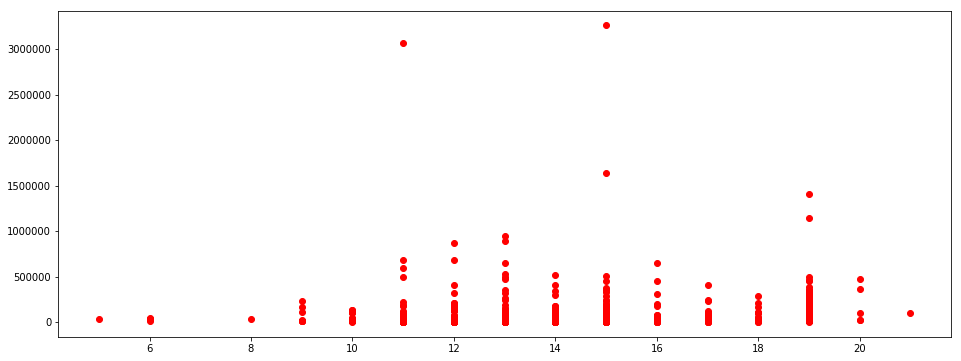

In [42]:
plt.plot(structdf['fields'],structdf['spec_len'], 'ro')

In [43]:
display(structdf.groupby('pam_fit$clustering').median())

,swagger,info,host,basePath,schemes,consumes,produces,paths,definitions,parameters,...,tags,externalDocs,title,description,termsOfService,contact,license,version,fields,spec_len
pam_fit$clustering,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,0,1,1,1,0,...,0,0,1,1,0,1,0,1,12,23164
2,1,1,1,1,1,0,0,1,1,1,...,1,1,1,1,1,1,1,1,16,27557
3,1,1,1,1,1,0,1,1,1,0,...,0,0,1,1,0,1,0,1,14,20144
4,1,1,1,1,1,1,1,1,1,0,...,1,0,1,1,0,0,0,1,13,8700
5,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,19,80043
6,1,1,1,0,1,1,1,1,1,1,...,0,0,1,0,0,0,0,1,13,24688
7,1,1,1,0,1,1,1,1,1,1,...,0,0,1,1,0,0,0,1,14,19703
8,1,1,1,1,1,0,0,1,1,1,...,1,1,1,1,0,1,0,1,15,45581


In [44]:
structdf.groupby('pam_fit$clustering').min()

,swagger,info,host,basePath,schemes,consumes,produces,paths,definitions,parameters,...,tags,externalDocs,title,description,termsOfService,contact,license,version,fields,spec_len
pam_fit$clustering,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,6,1362
2,0,1,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,1,9,3636
3,1,1,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,11,1584
4,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,5,1435
5,1,1,1,0,1,1,1,1,0,0,...,0,0,1,0,0,0,0,1,15,2483
6,1,1,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,10,1529
7,1,1,1,0,1,0,0,1,1,0,...,0,0,1,1,0,0,0,1,11,2974
8,1,1,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,11,1526


In [45]:
stat_struct = structdf[["pam_fit$clustering","spec_len"]]
stat_struct = stat_struct.groupby('pam_fit$clustering').median()
stat_struct

,spec_len
pam_fit$clustering,
1,23164
2,27557
3,20144
4,8700
5,80043
6,24688
7,19703
8,45581


In [46]:
# medoidscomplete0518.csv
medoidpathdf = pd.read_csv('medoidscomplete0518.csv',index_col='X')
medoidpathdf = medoidpathdf.iloc[:,1:]
#pathdf['spec_len'] = spec_len
with pd.option_context('display.max_rows', None, 'display.max_columns', 30):
    print(medoidpathdf)


                                 swagger  info  host  basePath  schemes  \
X                                                                         
weatherbit.io                          1     1     1         1        1   
googleapis.com:adexchangebuyer2        1     1     1         1        1   
voodoomfg.com                          1     1     1         1        1   
neowsapp.com                           1     1     1         1        1   
amazonaws.com:xray                     1     1     1         1        1   
azure.com:automation-account           1     1     1         0        1   
windows.net:graphrbac                  1     1     1         0        1   
googleapis.com:youtubereporting        1     1     1         1        1   

                                 consumes  produces  paths  definitions  \
X                                                                         
weatherbit.io                           0         1      1            1   
googleapis.com:adexchang

In [47]:
medoids = list(medoidpathdf.index.values)
print(type(medoids))
medoids

<class 'list'>


['weatherbit.io',
 'googleapis.com:adexchangebuyer2',
 'voodoomfg.com',
 'neowsapp.com',
 'amazonaws.com:xray',
 'azure.com:automation-account',
 'windows.net:graphrbac',
 'googleapis.com:youtubereporting']

In [48]:
medoids_df = structdf.loc[medoids]
medoids_df = medoids_df[["pam_fit$clustering", "spec_len"]]
medoids_df

,pam_fit$clustering,spec_len
X,,
weatherbit.io,1,121837
googleapis.com:adexchangebuyer2,2,84758
voodoomfg.com,3,23647
neowsapp.com,4,9342
amazonaws.com:xray,5,38236
azure.com:automation-account,6,67102
windows.net:graphrbac,7,61023
googleapis.com:youtubereporting,8,25702


In [49]:
lengths_struct = []
for i in range(1,9):
    cluster_n =  structdf['pam_fit$clustering']== i
    clust_df = structdf[cluster_n]
    mean = clust_df["spec_len"].mean().astype(int)
    median = clust_df["spec_len"].median()
    print("Cluster {} has a spec length mean of {} and a median of {}".format(i, mean, median))
    lengths_struct.append([i, mean, median])

Cluster 1 has a spec length mean of 74326 and a median of 23164.0
Cluster 2 has a spec length mean of 59664 and a median of 27557.0
Cluster 3 has a spec length mean of 69744 and a median of 20144.0
Cluster 4 has a spec length mean of 65690 and a median of 8700.0
Cluster 5 has a spec length mean of 128144 and a median of 80043.0
Cluster 6 has a spec length mean of 59452 and a median of 24688.0
Cluster 7 has a spec length mean of 34827 and a median of 19703.0
Cluster 8 has a spec length mean of 91078 and a median of 45581.0


In [50]:
lengths_struct

[[1, 74326, 23164.0],
 [2, 59664, 27557.0],
 [3, 69744, 20144.0],
 [4, 65690, 8700.0],
 [5, 128144, 80043.0],
 [6, 59452, 24688.0],
 [7, 34827, 19703.0],
 [8, 91078, 45581.0]]

In [51]:
len_df = pd.DataFrame.from_records(lengths_struct)
len_df.columns = ['cluster','mean', 'median']
len_df.set_index('cluster', inplace=True)
len_df

,mean,median
cluster,,
1,74326,23164.0
2,59664,27557.0
3,69744,20144.0
4,65690,8700.0
5,128144,80043.0
6,59452,24688.0
7,34827,19703.0
8,91078,45581.0


Now lets look into certain clusters:

In [52]:
cluster_n =  structdf['pam_fit$clustering']==8
structdf[cluster_n]

,swagger,info,host,basePath,schemes,consumes,produces,paths,definitions,parameters,...,externalDocs,title,description,termsOfService,contact,license,version,pam_fit$clustering,fields,spec_len
X,,,,,,,,,,,,,,,,,,,,,
consumerfinance.gov,1,1,1,1,1,0,0,1,1,0,...,1,1,1,0,0,0,1,8,12,4286
data.gov,1,1,1,1,1,0,0,1,0,0,...,1,1,1,0,0,0,1,8,13,10269
exavault.com,1,1,1,1,1,0,0,1,1,0,...,1,1,1,0,0,0,1,8,12,52751
geodesystems.com,1,1,1,1,1,0,0,1,0,0,...,0,1,1,0,0,0,1,8,11,685831
googleapis.com:abusiveexperiencereport,1,1,1,1,1,0,0,1,1,1,...,1,1,1,0,1,0,1,8,15,6918
googleapis.com:acceleratedmobilepageurl,1,1,1,1,1,0,0,1,1,1,...,1,1,1,0,1,0,1,8,14,5926
googleapis.com:adexchangebuyer,1,1,1,1,1,0,0,1,1,1,...,1,1,1,0,1,0,1,8,15,15612
googleapis.com:adexperiencereport,1,1,1,1,1,0,0,1,1,1,...,1,1,1,0,1,0,1,8,15,7432
googleapis.com:adsensehost,1,1,1,1,1,0,0,1,1,1,...,1,1,1,0,1,0,1,8,15,42058
